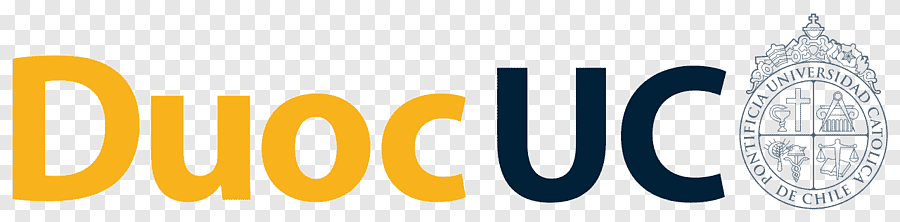

>Integrantes : Rodrigo Aravena

>Asignatura : Deep Learning

>Profesor: Isrrael Naranjo

# Introduccion
Para introducir en el trabajo se realizara web scraping a la pagina https://www.getonbrd.com/ donde se extraera todos los datos de los empleos de data science la tabla que se van a extraer son Título, Experiencia, Empresa, Ubicación, Modalidad , Link, Descripcion y se hara text mining sacando las palabras ma recurrenter y luego se hara el analisis de un video donde se extraera el audio y despues se sacara fragmento de lo que habla el video es decir sacar de video a texto

In [85]:
import string
import requests
import pandas as pd
import nltk
from wordcloud import WordCloud
from collections import Counter

In [86]:
import gensim
from gensim.utils import simple_preprocess
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
!pip install yt_dlp
!pip install youtube_dl
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
# Se ingresa la url a investigar en este caso es de getonbrd con empleos de data science donde despuesse
# comprueba si el link es viable haciendo web scraping dando la respues 200 que es en este caso
url = 'https://www.getonbrd.com/empleos-Data-Science'
response = requests.get(url)
print(response)
#########################
# Aqui se utiliza la libreria BeautifulSoup para analizar el contenido HTML y crea un objeto soup que se puede utilizar para manipular y extraer datos
soup = BeautifulSoup(response.content, 'html.parser')
# Buscamos todos los elementos <a> con la clase 'color-hierarchy2 gb-results-list__item'
links = soup.find_all('a', class_='color-hierarchy2 gb-results-list__item')
# Limitamos la lista de enlaces a los primeros 40 elementos
links_limitados = links[:34]
# Creamos una lista vacía para almacenar los datos de los enlaces
datos_links = []
# Iteramos sobre cada enlace en links_lim
for link in links_limitados:
    # Obtenemos el atributo 'href' de cada enlace
    href = link.get('href')
    # Agregamos el enlace a la lista de datos
    datos_links.append([href])
linkesito = str(datos_links[33])

<Response [200]>


In [89]:
contador = 0
from requests.api import request
# Extracción de elementos de la página web utilizando BeautifulSoup (presumiblemente)
jobs = soup.find_all('strong', class_='color-hierarchy1 pr-3')
experience = soup.find_all('span', class_="color-hierarchy3")
companies = soup.find_all('div', class_='size0')
city = soup.find_all('span', class_='location')
modalities = soup.find_all('span', class_='tooltipster')

data = []  # Lista vacía para almacenar los datos extraídos

# Recorriendo las listas en paralelo utilizando la función zip
for job, experience, company, location, modality in zip(jobs, experience, companies, city, modalities):
    title = job.text.strip()                                                    # Extrayendo el texto del elemento job y eliminando espacios en blanco
    exp_list = experience.text.strip().split()[:2]                              # Extrayendo los primeros dos elementos de la experiencia
    exp_text = ' '.join(exp_list) if len(exp_list) > 1 else exp_list[0]         # Concatenando los elementos de la experiencia
    exp_text = exp_text.strip('|')                                              # Eliminando el carácter "|" de la experiencia
    company_name = company.contents[0].strip()                                  # Extrayendo el texto del primer contenido del elemento company y eliminando espacios en blanco
    city_state = str(modality.text.strip().split()[1:2])                        # Extrayendo el segundo elemento del texto de modality
    city_state = city_state.strip("[('')]")                                     # Eliminando caracteres no deseados de city_state
    if city_state == '':
        city_state = 'NULL'                                                     # Asignando "NULL" si city_state está vacío
    mode = str(modality.text.strip().split()[:1])                               # Extrayendo el primer elemento del texto de modality
    mode = mode.strip("[('')]")                                                 # Eliminando caracteres no deseados de mode
    linkesito = str(datos_links[contador])                                      # Obteniendo el enlace de datos_links según el valor de contador
    linkesito = linkesito.strip("['']")                                         # Eliminando caracteres no deseados de linkesito
    url_descripcion = datos_links[contador]                                     # Obteniendo la URL de datos_links según el valor de contador
    data.append([title, exp_text, company_name, city_state, mode, linkesito])   # Agregando los datos a la lista data
    contador = contador + 1                                                     # Incrementando el contador en 1

    if contador == 34:
        break
cantidad_links = len(datos_links)
datos_descripcion = []

for i in range(cantidad_links):
    linkesito = str(datos_links[i]) # Obtiene el enlace correspondiente al índice actual
    linkesito = linkesito.strip("['']")
    response = requests.get(linkesito)
    soup = BeautifulSoup(response.content, 'html.parser') # Analiza el contenido HTML de la respuesta
    funtions_items = soup.find_all('div', class_="gb-rich-txt")# Busca todos los elementos <div> con la clase 'gb-rich-txt'

    for funtions in funtions_items:
        job_funti_element = funtions.find('p')# Busca el primer elemento <p> dentro de cada elemento funtions

        if job_funti_element is not None:
            job_funti = job_funti_element.text
            datos_descripcion.append(job_funti)
            break
        else:
            datos_descripcion.append('NULL')
            break

    i = i + 1
len(datos_descripcion)


34

In [90]:
# Iterar sobre un rango de valores
for i in range(cantidad_links):
    # Agregar datos_descripcion a la lista en la posición i de data
    data[i].append(datos_descripcion[i])

    # Incrementar i en 1
    i = i + 1

    # Si i es igual a 33, romper el bucle
    if i == 33:
        break
# Crear un DataFrame de Pandas con los datos de la lista data
# y especificar los nombres de las columnas
df = pd.DataFrame(data, columns=['Título', 'Experiencia', 'Empresa', 'Ubicación', 'Modalidad', 'Link', 'Descripcion'])

# Imprimir las primeras 100 filas del DataFrame
df.head()

,Título,Experiencia,Empresa,Ubicación,Modalidad,Link,Descripcion
0,IT Senior Service Manager,Senior,Softserve,Chile,Remote,https://www.getonbrd.com/jobs/operations-manag...,WE ARESoftServe is a leading technology soluti...
1,Administrador Data Loss Prevention (Dlp),Semi Senior,Accenture,Chile,Remote,https://www.getonbrd.com/jobs/data-science-ana...,TRABAJA CON UN PROPÓSITOSúmate a nuestra área ...
2,Intermediate Full-Stack Engineer (.NET),Semi Senior,Softserve,Peru,Remote,https://www.getonbrd.com/jobs/programming/inte...,WE ARESoftServe is a global digital solutions ...
3,QA Engineer,Semi Senior,Haystack News,Chile,Remote,https://www.getonbrd.com/jobs/sysadmin-devops-...,NULL
4,Analista de Investigación de Mercados,No experience,RetailCompass,4,Remote,https://www.getonbrd.com/jobs/data-science-ana...,Logo Blanco.jpg706.67 KBRetailCompass es una s...


In [91]:
#se confierte todo las mayusculas a minusculas
df['Descripcion']= df['Descripcion'].str.lower()
df.head()

,Título,Experiencia,Empresa,Ubicación,Modalidad,Link,Descripcion
0,IT Senior Service Manager,Senior,Softserve,Chile,Remote,https://www.getonbrd.com/jobs/operations-manag...,we aresoftserve is a leading technology soluti...
1,Administrador Data Loss Prevention (Dlp),Semi Senior,Accenture,Chile,Remote,https://www.getonbrd.com/jobs/data-science-ana...,trabaja con un propósitosúmate a nuestra área ...
2,Intermediate Full-Stack Engineer (.NET),Semi Senior,Softserve,Peru,Remote,https://www.getonbrd.com/jobs/programming/inte...,we aresoftserve is a global digital solutions ...
3,QA Engineer,Semi Senior,Haystack News,Chile,Remote,https://www.getonbrd.com/jobs/sysadmin-devops-...,null
4,Analista de Investigación de Mercados,No experience,RetailCompass,4,Remote,https://www.getonbrd.com/jobs/data-science-ana...,logo blanco.jpg706.67 kbretailcompass es una s...


In [92]:
#Palabras en español separadas por comas
",".join(stopwords.words('spanish'))
#Palabras en Inglés separadas por comas
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [93]:
# Se cargan las palabras de detención en inglés y español
stop_words = set(stopwords.words('english'))
stop_words_es = set(stopwords.words('spanish'))
stop_words.update(stop_words_es)

def stopword_clean(x):
    # Se crea una lista vacía para almacenar las palabras sin detención
    stop_words=[]
    # Se procesa cada palabra en el texto utilizando simple_preprocess de gensim
    for word in gensim.utils.simple_preprocess(x):
        # Se verifica si la palabra no está en las palabras de detención
        if word not in stop_words:
            # Si no está en las palabras de detención, se agrega a la lista
            stop_words.append(word)
    # Se une la lista de palabras sin detención en un solo texto separado por espacios
    final_list=' '.join(stop_words)
    # Se devuelve el resultado final
    return final_list

In [94]:
# Aplicar la función stopword_clean a la columna 'Descripcion' y crear la columna 'Descripcion_Clean'
df['Descripcion_Clean'] = df['Descripcion'].apply(lambda x: stopword_clean(x))
# Mostrar los primeros registros del DataFrame actualizado
df.head()

,Título,Experiencia,Empresa,Ubicación,Modalidad,Link,Descripcion,Descripcion_Clean
0,IT Senior Service Manager,Senior,Softserve,Chile,Remote,https://www.getonbrd.com/jobs/operations-manag...,we aresoftserve is a leading technology soluti...,we aresoftserve is leading technology solution...
1,Administrador Data Loss Prevention (Dlp),Semi Senior,Accenture,Chile,Remote,https://www.getonbrd.com/jobs/data-science-ana...,trabaja con un propósitosúmate a nuestra área ...,trabaja con un propósitosúmate nuestra área de...
2,Intermediate Full-Stack Engineer (.NET),Semi Senior,Softserve,Peru,Remote,https://www.getonbrd.com/jobs/programming/inte...,we aresoftserve is a global digital solutions ...,we aresoftserve is global digital solutions co...
3,QA Engineer,Semi Senior,Haystack News,Chile,Remote,https://www.getonbrd.com/jobs/sysadmin-devops-...,null,null
4,Analista de Investigación de Mercados,No experience,RetailCompass,4,Remote,https://www.getonbrd.com/jobs/data-science-ana...,logo blanco.jpg706.67 kbretailcompass es una s...,logo blanco jpg kbretailcompass es una startup...


In [95]:
# Combinacion de columnas
columnas_texto = ['Experiencia', 'Modalidad','Descripcion_Clean']
#Declaracion de variable de texto que contiene las columnas combinadas
texto_combinado = ' '.join(df[columnas_texto].astype(str).values.flatten())
texto_combinado

'Senior  Remote we aresoftserve is leading technology solutions company specializing in software development and consultancy services with over associates currently working on more than projects serve clients the usa europe apac region are passionate about people who create bold things make difference have fun love their work Semi Senior Remote trabaja con un propósitosúmate nuestra área de accenture technology sé parte del cambio te invitamos abrir las puertas mundo digital donde podrás desarrollar tu talento para crecer aprender certificarte en tecnologías más avanzadas proporcionar innovación continua ágil participar nuevos negocios descubre el compromiso la energía que dedicamos transformar forma trabajar nuestros clientes comunidad una mirada hacia futuro actualmente nos encontramos búsqueda administrador data loss prevention dlp ganas enfrentar desafíos Semi Senior Remote we aresoftserve is global digital solutions company with headquarters in austin texas founded associates are 

In [96]:
# Tokenizar el texto en palabras
palabras = word_tokenize(texto_combinado)

# Obtener las stopwords en español
stopwords_es = set(stopwords.words('spanish'))
stopwords_en = set(stopwords.words('english'))
#Eliminar la palabra null
palabra_a_eliminar = "null"

# Filtrar las palabras de menos de 3 letras y las stopwords del texto
palabras_filtradas = [palabra for palabra in palabras if len(palabra) >= 3 and palabra.casefold() not in stopwords_es]
palabras_filtradas2 = [palabra for palabra in palabras_filtradas if len(palabra) >= 3 and palabra.casefold() not in stopwords_en if palabra != palabra_a_eliminar]

# Unir las palabras filtradas en un nuevo texto
texto_filtrado = ' '.join(palabras_filtradas2)

# Imprimir el resultado
print(texto_filtrado)

Senior Remote aresoftserve leading technology solutions company specializing software development consultancy services associates currently working projects serve clients usa europe apac region passionate people create bold things make difference fun love work Semi Senior Remote trabaja propósitosúmate área accenture technology parte cambio invitamos abrir puertas mundo digital podrás desarrollar talento crecer aprender certificarte tecnologías avanzadas proporcionar innovación continua ágil participar nuevos negocios descubre compromiso energía dedicamos transformar forma trabajar clientes comunidad mirada hacia futuro actualmente encontramos búsqueda administrador data loss prevention dlp ganas enfrentar desafíos Semi Senior Remote aresoftserve global digital solutions company headquarters austin texas founded associates currently working projects clients usa europe apac region people create bold things make difference fun love work january started operations latin america made commi

In [97]:
import pandas as pd
from collections import Counter

# Calcular la frecuencia de las palabras
word_frequency = Counter(texto_filtrado.split())

# Obtener el top ordenado de las palabras más frecuentes
top_words = word_frequency.most_common()

# Crear un DataFrame con los resultados
df_top_words = pd.DataFrame(top_words, columns=['Palabra', 'Frecuencia'])

# Mostrar el DataFrame con el top de palabras más frecuentes
print(df_top_words)



          Palabra  Frecuencia
0          Remote          33
1          Senior          28
2            Semi          14
3       solutions           7
4            data           7
..            ...         ...
465    integrarse           1
466         líder           1
467   habilidades           1
468  comunicación           1
469  proactividad           1

[470 rows x 2 columns]


In [98]:
# Creacion de WordCloud
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(word_frequency)

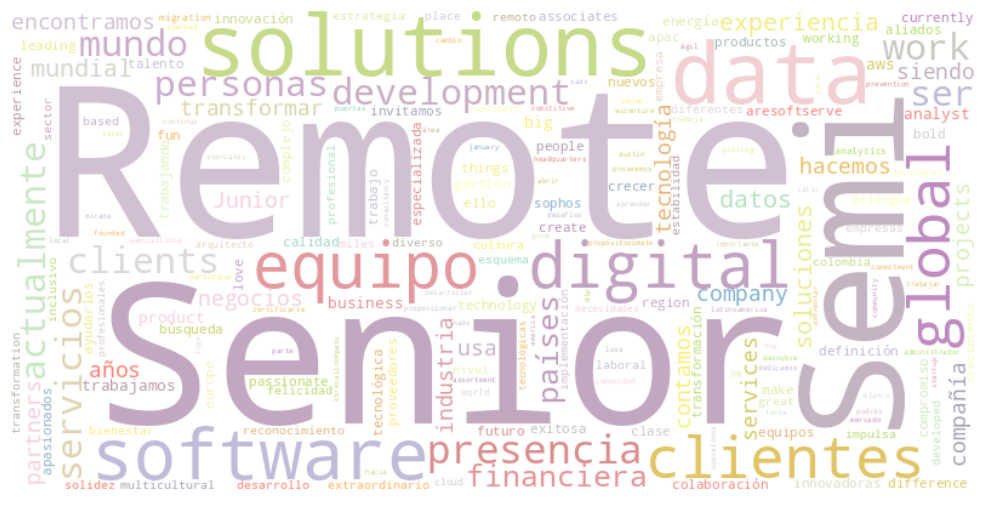

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Set3_12

# Crear una instancia de WordCloud
wordcloud = WordCloud(background_color='white', colormap=Set3_12.mpl_colormap, width=800, height=400)

# Generar el mapa de palabras con tus datos
wordcloud.generate_from_frequencies(word_frequency)

# Mostrar el mapa de palabras con un diseño personalizado
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Guardar el mapa de palabras en un archivo
plt.savefig('wordcloud.png')

# Mostrar el mapa de palabras
plt.show()


In [100]:
import youtube_dl
import yt_dlp as youtube_dl
# Url de video
url = 'https://www.youtube.com/watch?v=Jz7RI5QZNhg'
# Tipo de archivo
output_file = 'audio.wav'
# Opciones de youtube_dl
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}
# Descargar el audio del video de YouTube
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Jz7RI5QZNhg
[youtube] Jz7RI5QZNhg: Downloading webpage
[youtube] Jz7RI5QZNhg: Downloading android player API JSON
[info] Jz7RI5QZNhg: Downloading 1 format(s): 251
[dashsegments] Total fragments: 1
[download] Destination: Nes x Galee Galee - Dios Me Bendice #01 [Official Music Video] [Jz7RI5QZNhg].webm
[download] 100% of    2.63MiB in 00:00:00 at 19.61MiB/s              
[ExtractAudio] Destination: Nes x Galee Galee - Dios Me Bendice #01 [Official Music Video] [Jz7RI5QZNhg].wav
Deleting original file Nes x Galee Galee - Dios Me Bendice #01 [Official Music Video] [Jz7RI5QZNhg].webm (pass -k to keep)


In [101]:
import speech_recognition as sr
r = sr.Recognizer()
audio_file = sr.AudioFile('Nes x Galee Galee - Dios Me Bendice #01 [Official Music Video] [Jz7RI5QZNhg].wav')
# Utilizar un bloque with para asegurar la correcta liberación de recursos del archivo de audio
with audio_file as source:
    audio_analizar = r.record(source)
# Realizar el reconocimiento de voz utilizando el servicio de reconocimiento de Google
text_1 = r.recognize_google(audio_analizar, language='es-ES')
# Imprimir el texto transrito
print(text_1)


Netflix la pantalla del automóvil siempre conozco tengo problema no veo ninguna Tussam mafia lo mejor
